In [1]:

import os
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn_utils import classify_data, sample_size_impact, search_params


In [2]:

FILENAME = "detect.csv"
model_type = "svc"

# load sample data
data = pd.read_csv(os.path.join(os.curdir, "data", FILENAME))

# separate into train and test
x_train, x_test, y_train, y_test = train_test_split(data["text"], data["label"], 
                                                    test_size=0.3, 
                                                    random_state=0)


# Impact of Tokenizer

Default Tokenizer

              precision    recall  f1-score   support

           0       0.92      0.87      0.89      2968
           1       0.88      0.93      0.90      3032

    accuracy                           0.90      6000
   macro avg       0.90      0.90      0.90      6000
weighted avg       0.90      0.90      0.90      6000



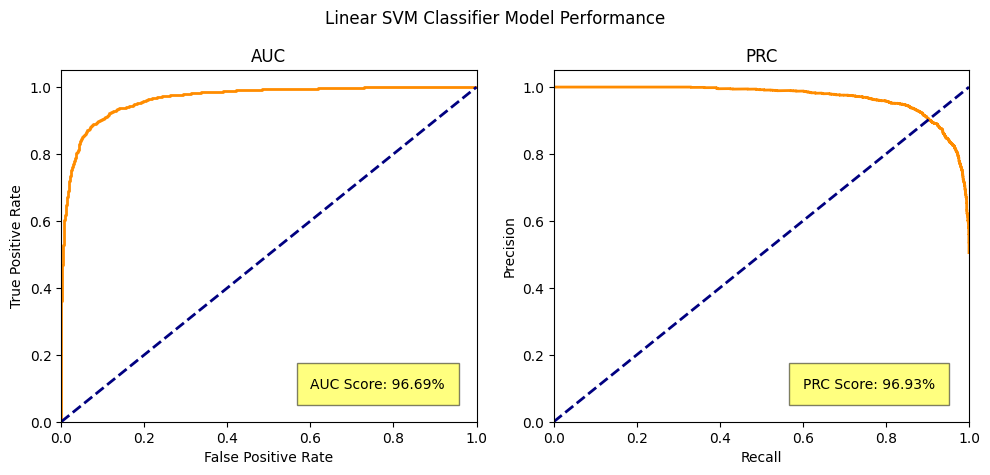

Custom Tokenizer; stopwords = 'english'

              precision    recall  f1-score   support

           0       0.90      0.82      0.86      2968
           1       0.84      0.91      0.88      3032

    accuracy                           0.87      6000
   macro avg       0.87      0.87      0.87      6000
weighted avg       0.87      0.87      0.87      6000



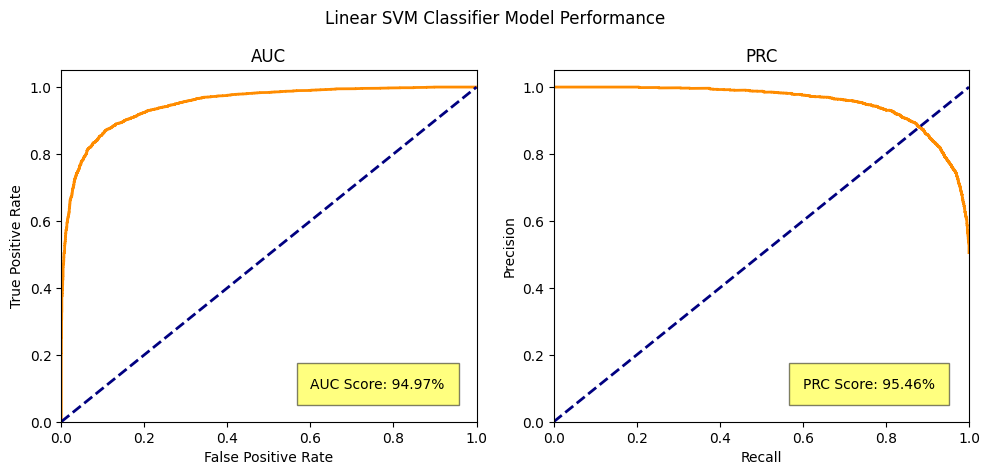

In [3]:

# default tokenizer
print("Default Tokenizer\n")
_ = classify_data(x_train, y_train, x_test, y_test, 
            model_type=model_type, 
            min_df=1, 
            stop_words=None,
            algorithm_para=1.0)

# custom tokenizer
print("Custom Tokenizer; stopwords = 'english'\n")
_ = classify_data(x_train, y_train, x_test, y_test, 
            model_type=model_type, 
            min_df=1, 
            stop_words="english",
            algorithm_para=1.0)

# Optimize with Grid Search

Optimal Grid Search Parameters:
Best f1 score = 0.911
Min. DF = 5
Stopwords = None
Classifier Hyper-parameter: 0.5

              precision    recall  f1-score   support

           0       0.91      0.92      0.91      2968
           1       0.92      0.91      0.92      3032

    accuracy                           0.92      6000
   macro avg       0.92      0.92      0.92      6000
weighted avg       0.92      0.92      0.92      6000



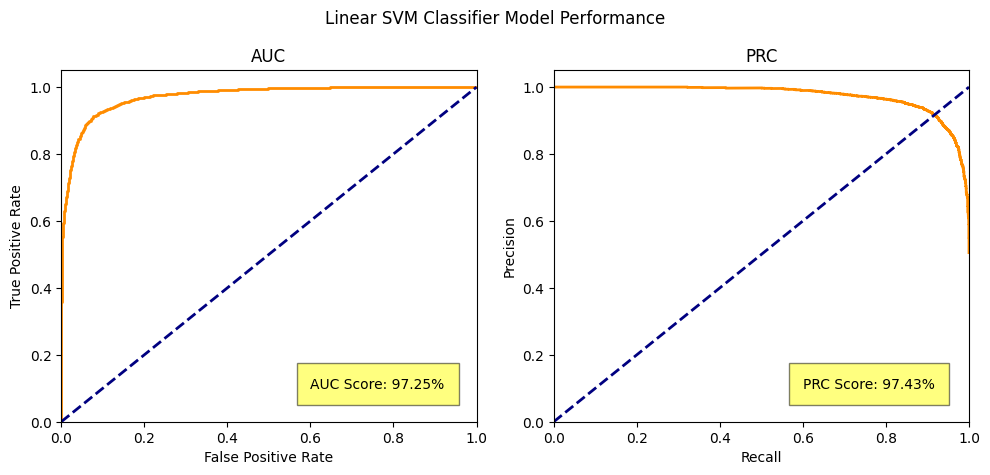

In [5]:

min_df, stop_words, C = search_params(x_train, y_train, clf=model_type)

_ = classify_data(x_train, y_train, x_test, y_test, 
            model_type=model_type, 
            min_df=min_df, 
            stop_words=stop_words,
            algorithm_para=C)


# Impact of Sample Size

Training sample size: 0.1
              precision    recall  f1-score   support

           0       0.85      0.80      0.83      8996
           1       0.81      0.86      0.84      9004

    accuracy                           0.83     18000
   macro avg       0.83      0.83      0.83     18000
weighted avg       0.83      0.83      0.83     18000



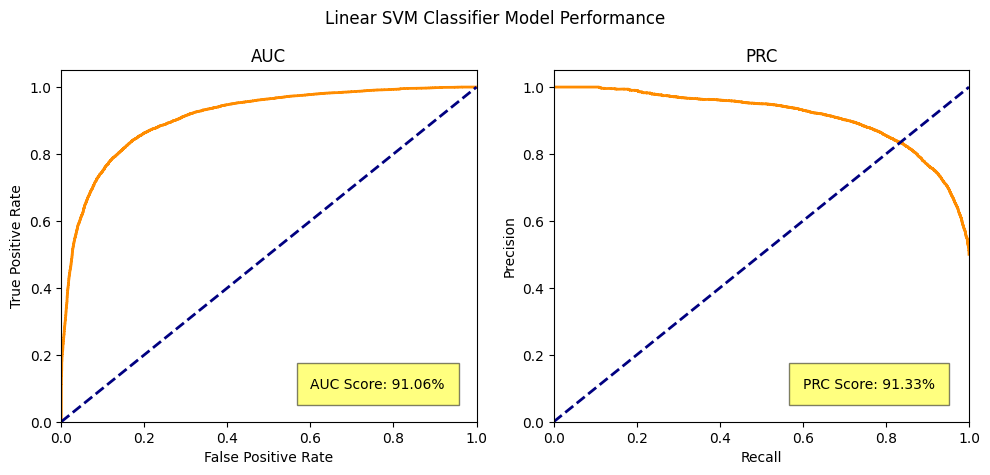

Training sample size: 0.2
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      7966
           1       0.85      0.89      0.87      8034

    accuracy                           0.87     16000
   macro avg       0.87      0.87      0.87     16000
weighted avg       0.87      0.87      0.87     16000



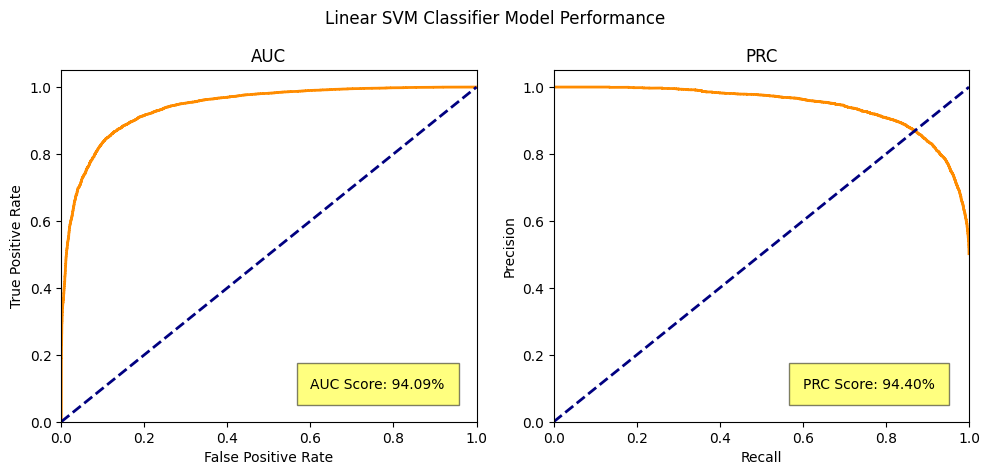

Training sample size: 0.3
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      6985
           1       0.86      0.90      0.88      7015

    accuracy                           0.88     14000
   macro avg       0.88      0.88      0.88     14000
weighted avg       0.88      0.88      0.88     14000



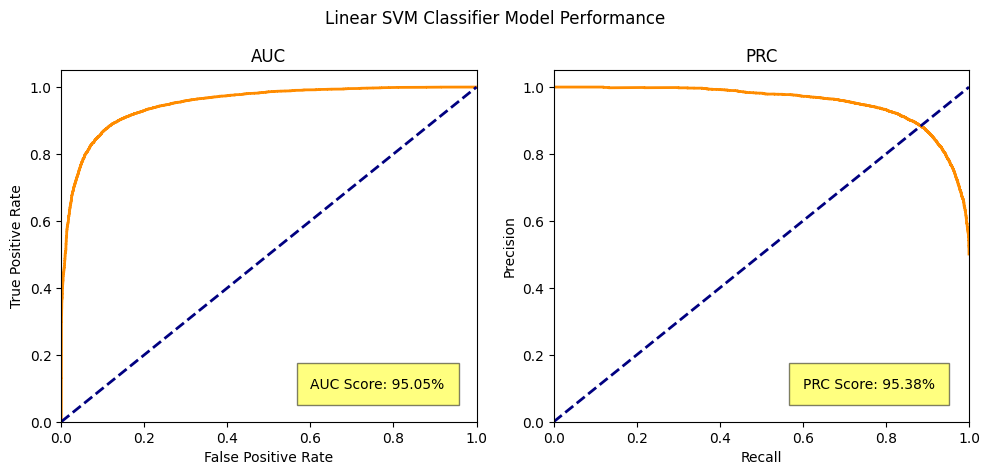

Training sample size: 0.4
              precision    recall  f1-score   support

           0       0.91      0.86      0.88      5959
           1       0.87      0.92      0.89      6041

    accuracy                           0.89     12000
   macro avg       0.89      0.89      0.89     12000
weighted avg       0.89      0.89      0.89     12000



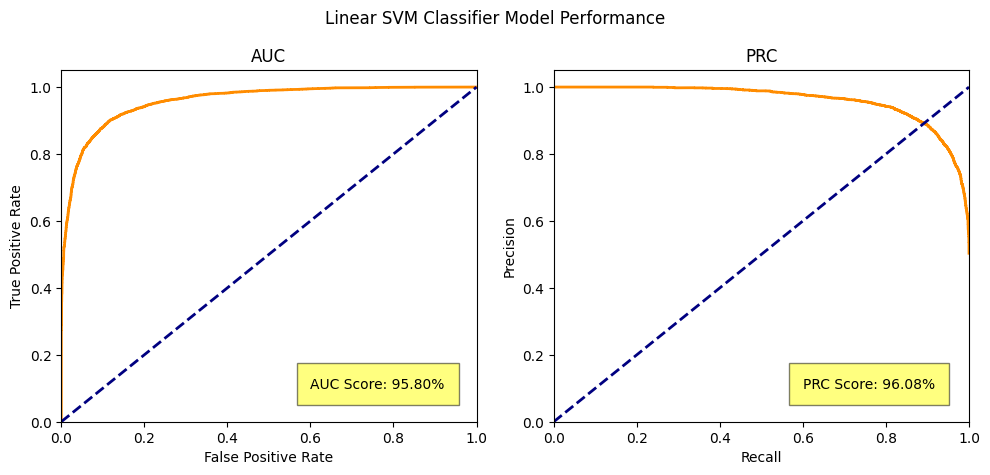

Training sample size: 0.5
              precision    recall  f1-score   support

           0       0.92      0.87      0.89      4976
           1       0.87      0.92      0.90      5024

    accuracy                           0.89     10000
   macro avg       0.90      0.89      0.89     10000
weighted avg       0.90      0.89      0.89     10000



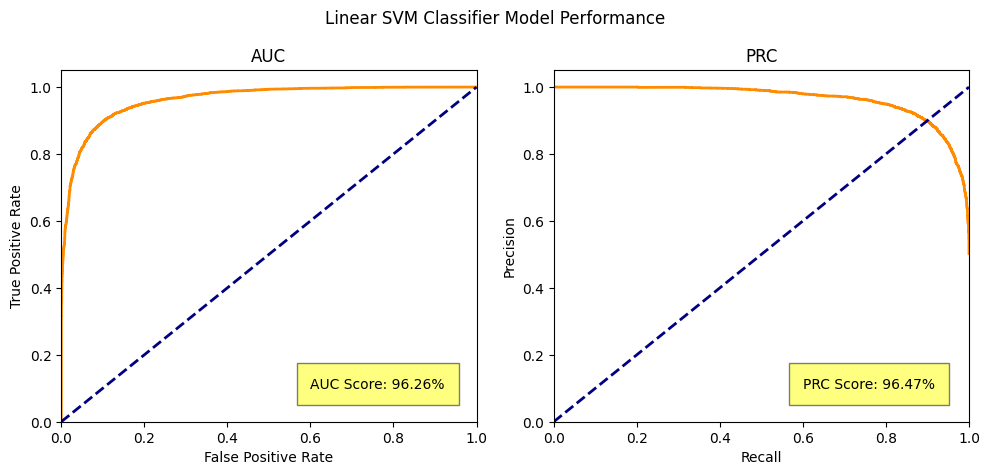

Training sample size: 0.6
              precision    recall  f1-score   support

           0       0.92      0.86      0.89      3967
           1       0.87      0.93      0.90      4033

    accuracy                           0.89      8000
   macro avg       0.90      0.89      0.89      8000
weighted avg       0.90      0.89      0.89      8000



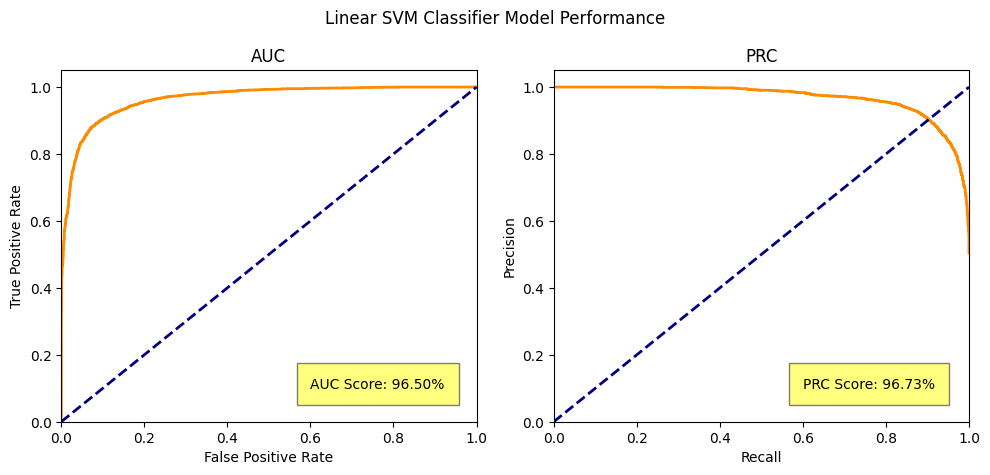

Training sample size: 0.7
              precision    recall  f1-score   support

           0       0.92      0.87      0.89      2968
           1       0.88      0.93      0.90      3032

    accuracy                           0.90      6000
   macro avg       0.90      0.90      0.90      6000
weighted avg       0.90      0.90      0.90      6000



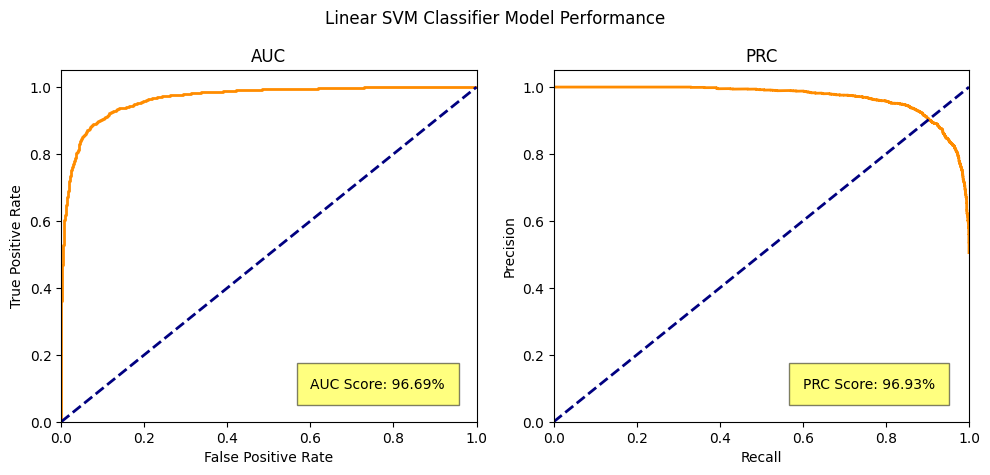

Training sample size: 0.8
              precision    recall  f1-score   support

           0       0.93      0.86      0.90      1966
           1       0.88      0.94      0.91      2034

    accuracy                           0.90      4000
   macro avg       0.90      0.90      0.90      4000
weighted avg       0.90      0.90      0.90      4000



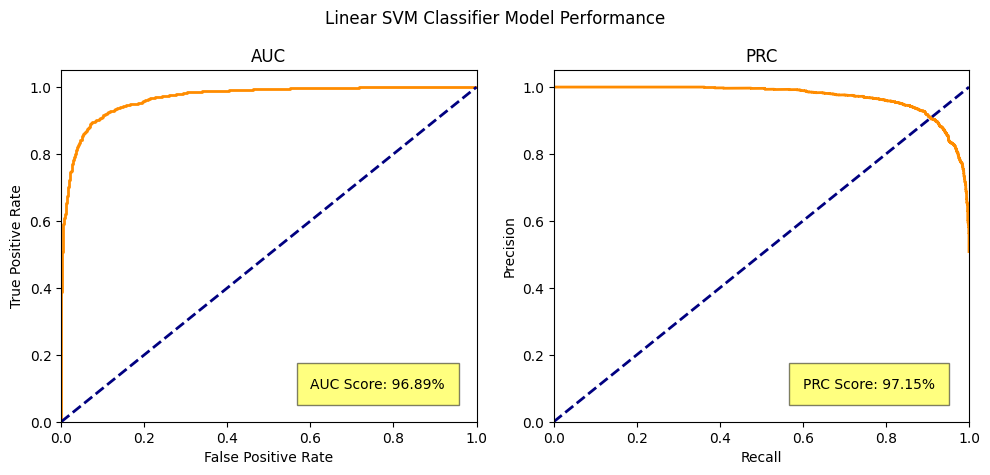

Training sample size: 0.9
              precision    recall  f1-score   support

           0       0.94      0.87      0.90       987
           1       0.88      0.95      0.91      1013

    accuracy                           0.91      2000
   macro avg       0.91      0.91      0.91      2000
weighted avg       0.91      0.91      0.91      2000



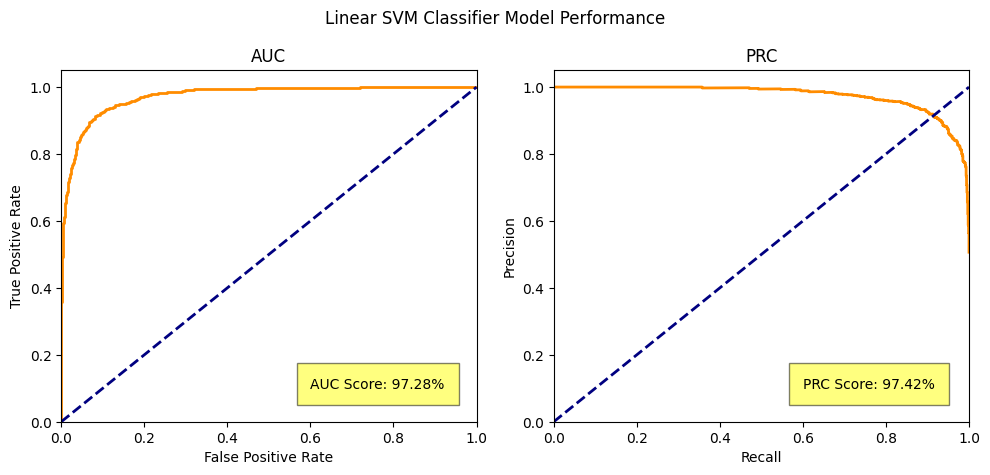

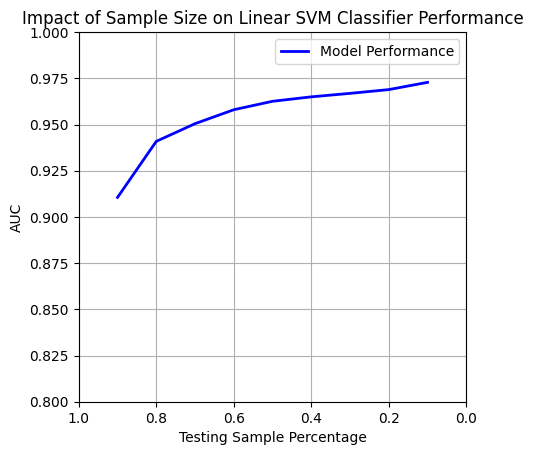

In [6]:

sample_size_impact(data["text"], data["label"], model_type)
